<a href="https://colab.research.google.com/github/pjastr-uwm/fakultet_io_2026/blob/main/nlp_nltk_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Przetwarzanie Języka Naturalnego (NLP) z pakietem NLTK

## Czym jest NLP?

**NLP (Natural Language Processing)** — czyli **przetwarzanie języka naturalnego** — to dziedzina informatyki i sztucznej inteligencji, która zajmuje się interakcją między komputerami a ludzkim językiem.

Mówiąc prościej: NLP to zbiór technik, które pozwalają komputerom **rozumieć, analizować i generować** tekst napisany przez ludzi.

### Gdzie spotykamy NLP na co dzień?
- **Tłumacz Google** — tłumaczy teksty między językami
- **Siri / Alexa / Asystent Google** — rozumieją nasze komendy głosowe
- **Filtr spamu** — rozpoznaje niechciane wiadomości e-mail
- **Autouzupełnianie** — podpowiada słowa podczas pisania
- **Analiza opinii** — firmy analizują recenzje klientów

### Czym jest NLTK?

**NLTK (Natural Language Toolkit)** to najpopularniejsza biblioteka Pythona do pracy z tekstem. Zawiera gotowe narzędzia, słowniki i algorytmy potrzebne do analizy języka. Jest idealna do nauki NLP, ponieważ jest dobrze udokumentowana i intuicyjna.

---

W tym notatniku przejdziemy krok po kroku przez najważniejsze techniki NLP:

1. **Tokenizacja** — dzielenie tekstu na mniejsze części
2. **Usuwanie stop words** — filtrowanie nieistotnych słów
3. **Stemming** — redukcja słów do rdzenia
4. **Lematyzacja** — sprowadzanie słów do formy podstawowej
5. **Tagowanie części mowy (POS tagging)** — oznaczanie ról słów w zdaniu
6. **Rozpoznawanie nazw własnych (NER)** — identyfikacja osób, miejsc, organizacji
7. **Analiza częstotliwości słów** — które słowa pojawiają się najczęściej?
8. **N-gramy** — analizowanie sekwencji słów
9. **Analiza sentymentu** — czy tekst jest pozytywny, negatywny czy neutralny?
10. **Dystrybucja leksykalna i chmura słów** — wizualizacja tekstu

---
## ⚙️ Instalacja i konfiguracja

Poniższe komendy zainstalują wszystkie potrzebne pakiety i pobiorą zasoby NLTK. Wystarczy uruchomić tę komórkę raz na początku sesji.

In [ ]:
# Install required packages
!pip install nltk wordcloud matplotlib --quiet

import nltk

# Download NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker')
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')
nltk.download('vader_lexicon')
nltk.download('gutenberg')
nltk.download('book')

print("\n✅ Wszystko gotowe! Możemy zaczynać.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]   


✅ Wszystko gotowe! Możemy zaczynać.


[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | 
[nltk_data]  Done downloading collection book


---
## 📚 Przygotowanie tekstu do analizy

Aby przećwiczyć techniki NLP, potrzebujemy przykładowego tekstu. Użyjemy fragmentu w języku angielskim (NLTK najlepiej obsługuje angielski) oraz wbudowanego korpusu tekstów.

**Korpus** (ang. *corpus*) to po prostu duży zbiór tekstów używany do analizy językowej.

In [ ]:
# Sample text for our experiments
sample_text = """
Natural Language Processing (NLP) is a fascinating field of artificial intelligence.
It helps computers understand, interpret, and generate human language.
NLP combines computational linguistics with statistical, machine learning,
and deep learning models. Companies like Google, Amazon, and Microsoft
use NLP in their products every day. For example, Google Translate uses
NLP to translate text between over 100 languages. Chatbots and virtual
assistants like Siri and Alexa also rely heavily on NLP technologies.
The field has grown rapidly since 2018, when transformer models like
BERT and GPT were introduced. Today, NLP is one of the most active
areas of AI research, with new breakthroughs happening every month.
"""

print("Przykładowy tekst załadowany.")
print(f"Długość tekstu: {len(sample_text)} znaków")

Przykładowy tekst załadowany.
Długość tekstu: 720 znaków


---
## 1. 🔪 Tokenizacja (Tokenization)

### Co to jest tokenizacja?

**Tokenizacja** to proces dzielenia tekstu na mniejsze jednostki zwane **tokenami**. Token to najmniejsza sensowna część tekstu.

Wyobraź sobie, że masz zdanie: *"Kot siedzi na macie."*

Tokenizacja podzieli je na: `["Kot", "siedzi", "na", "macie", "."]`

### Dlaczego to ważne?

Komputer nie rozumie zdań tak jak my. Musi najpierw **rozbić tekst na części**, żeby móc je analizować. Tokenizacja to **zawsze pierwszy krok** w każdym zadaniu NLP.

### Rodzaje tokenizacji

- **Tokenizacja na słowa** (`word_tokenize`) — dzieli tekst na pojedyncze słowa i znaki interpunkcyjne
- **Tokenizacja na zdania** (`sent_tokenize`) — dzieli tekst na całe zdania

In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize

# --- Sentence tokenization ---
# Split text into individual sentences
sentences = sent_tokenize(sample_text)

print("=" * 60)
print("TOKENIZACJA NA ZDANIA")
print("=" * 60)
print(f"Liczba zdań: {len(sentences)}\n")

for i, sent in enumerate(sentences, 1):
    print(f"  Zdanie {i}: {sent.strip()}")

print("\n")

# --- Word tokenization ---
# Split text into individual words/tokens
tokens = word_tokenize(sample_text)

print("=" * 60)
print("TOKENIZACJA NA SŁOWA")
print("=" * 60)
print(f"Liczba tokenów: {len(tokens)}\n")
print(f"Pierwsze 30 tokenów: {tokens[:30]}")

print("\n💡 Zwróć uwagę, że znaki interpunkcyjne (np. kropki, przecinki)")
print("   też są oddzielnymi tokenami — to ważne dla dalszej analizy!")

TOKENIZACJA NA ZDANIA
Liczba zdań: 8

  Zdanie 1: Natural Language Processing (NLP) is a fascinating field of artificial intelligence.
  Zdanie 2: It helps computers understand, interpret, and generate human language.
  Zdanie 3: NLP combines computational linguistics with statistical, machine learning,
and deep learning models.
  Zdanie 4: Companies like Google, Amazon, and Microsoft
use NLP in their products every day.
  Zdanie 5: For example, Google Translate uses
NLP to translate text between over 100 languages.
  Zdanie 6: Chatbots and virtual
assistants like Siri and Alexa also rely heavily on NLP technologies.
  Zdanie 7: The field has grown rapidly since 2018, when transformer models like
BERT and GPT were introduced.
  Zdanie 8: Today, NLP is one of the most active
areas of AI research, with new breakthroughs happening every month.


TOKENIZACJA NA SŁOWA
Liczba tokenów: 126

Pierwsze 30 tokenów: ['Natural', 'Language', 'Processing', '(', 'NLP', ')', 'is', 'a', 'fascinating', '

---
## 2. 🚫 Usuwanie stop words

### Co to są stop words?

**Stop words** (słowa stop / słowa funkcyjne) to najczęściej występujące słowa w danym języku, które **same w sobie nie niosą dużo znaczenia**.

Przykłady w języku angielskim: *the, is, at, which, on, a, an, in, it, for...*

Przykłady w języku polskim: *i, w, na, z, do, to, się, jest, że, nie...*

### Dlaczego je usuwamy?

Wyobraź sobie zdanie: *"The cat is sitting on the mat"*

Najważniejsze słowa to: *cat, sitting, mat* — reszta to "szum". Usuwając stop words, **pozbywamy się szumu** i zostawiamy słowa, które naprawdę opisują treść tekstu. Dzięki temu algorytmy działają szybciej i dokładniej.

In [ ]:
from nltk.corpus import stopwords
import string

# Load English stop words
stop_words = set(stopwords.words('english'))

print("=" * 60)
print("LISTA STOP WORDS (angielskie)")
print("=" * 60)
print(f"Liczba stop words: {len(stop_words)}")
print(f"Przykłady: {sorted(list(stop_words))[:20]}")

print("\n")

# Tokenize and convert to lowercase
tokens = word_tokenize(sample_text.lower())

# Remove stop words and punctuation
filtered_tokens = [
    token for token in tokens
    if token not in stop_words and token not in string.punctuation
]

print("=" * 60)
print("PORÓWNANIE: PRZED i PO usunięciu stop words")
print("=" * 60)
print(f"Przed: {len(tokens)} tokenów")
print(f"Po:    {len(filtered_tokens)} tokenów")
print(f"Usunięto: {len(tokens) - len(filtered_tokens)} tokenów ({(len(tokens) - len(filtered_tokens))/len(tokens)*100:.1f}%)\n")

print("Tokeny po filtracji:")
print(filtered_tokens)

print("\n💡 Widzisz? Zostały tylko słowa niosące znaczenie:")
print("   'natural', 'language', 'processing', 'nlp', 'field'...")

LISTA STOP WORDS (angielskie)
Liczba stop words: 198
Przykłady: ['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been']


PORÓWNANIE: PRZED i PO usunięciu stop words
Przed: 126 tokenów
Po:    78 tokenów
Usunięto: 48 tokenów (38.1%)

Tokeny po filtracji:
['natural', 'language', 'processing', 'nlp', 'fascinating', 'field', 'artificial', 'intelligence', 'helps', 'computers', 'understand', 'interpret', 'generate', 'human', 'language', 'nlp', 'combines', 'computational', 'linguistics', 'statistical', 'machine', 'learning', 'deep', 'learning', 'models', 'companies', 'like', 'google', 'amazon', 'microsoft', 'use', 'nlp', 'products', 'every', 'day', 'example', 'google', 'translate', 'uses', 'nlp', 'translate', 'text', '100', 'languages', 'chatbots', 'virtual', 'assistants', 'like', 'siri', 'alexa', 'also', 'rely', 'heavily', 'nlp', 'technologies', 'field', 'grown', 'rapidly', 'since', '2018', 'tr

---
## 3. 🌿 Stemming

### Co to jest stemming?

**Stemming** (rdzeniowanie) to proces **obcinania końcówek słów**, aby sprowadzić je do wspólnego rdzenia.

Na przykład:
- *running* → **run**
- *plays*, *played*, *playing* → **play**
- *connection*, *connected*, *connecting* → **connect**

### Jak to działa?

Stemmer stosuje **proste reguły obcinania** — np. "jeśli słowo kończy się na *-ing*, usuń *-ing*". Nie korzysta ze słownika, dlatego wyniki bywają "nieładne" — np. *studies* → *studi* (a nie *study*).

### Po co to robimy?

Jeśli szukamy informacji o "bieganiu", chcemy znaleźć teksty zawierające zarówno *run*, *running*, *runs*, jak i *runner*. Stemming pozwala traktować te wszystkie formy jako **jedno słowo**.

### Najpopularniejsze stemmery

- **Porter Stemmer** — klasyczny, delikatniejszy
- **Lancaster Stemmer** — bardziej agresywny (mocniej obcina)
- **Snowball Stemmer** — ulepszony Porter, obsługuje wiele języków

In [ ]:
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer

# Initialize three different stemmers
porter = PorterStemmer()
lancaster = LancasterStemmer()
snowball = SnowballStemmer('english')

# Test words to demonstrate stemming differences
test_words = [
    'running', 'plays', 'played', 'playing',
    'connection', 'connected', 'connecting',
    'studies', 'studying', 'happily',
    'processing', 'intelligence', 'languages',
    'computers', 'breakthroughs', 'technologies'
]

print("=" * 70)
print("PORÓWNANIE TRZECH STEMMERÓW")
print("=" * 70)
print(f"{'Słowo':<18} {'Porter':<15} {'Lancaster':<15} {'Snowball':<15}")
print("-" * 70)

for word in test_words:
    p = porter.stem(word)
    l = lancaster.stem(word)
    s = snowball.stem(word)
    print(f"{word:<18} {p:<15} {l:<15} {s:<15}")

print("\n💡 Zwróć uwagę na różnice:")
print("   - Lancaster jest najbardziej agresywny (obcina najwięcej)")
print("   - Porter i Snowball dają podobne, bardziej czytelne wyniki")
print("   - Żaden stemmer nie daje 'ładnych' słów — to normalne!")

PORÓWNANIE TRZECH STEMMERÓW
Słowo              Porter          Lancaster       Snowball       
----------------------------------------------------------------------
running            run             run             run            
plays              play            play            play           
played             play            play            play           
playing            play            play            play           
connection         connect         connect         connect        
connected          connect         connect         connect        
connecting         connect         connect         connect        
studies            studi           study           studi          
studying           studi           study           studi          
happily            happili         happy           happili        
processing         process         process         process        
intelligence       intellig        intellig        intellig       
languages          languag    

In [ ]:
# Apply stemming to our filtered text
stemmed_tokens = [porter.stem(token) for token in filtered_tokens]

print("=" * 60)
print("STEMMING NASZEGO TEKSTU (Porter Stemmer)")
print("=" * 60)

# Show before/after comparison for first 15 words
print(f"\n{'Oryginał':<20} {'Po stemmingu':<20}")
print("-" * 40)
for orig, stemmed in zip(filtered_tokens[:15], stemmed_tokens[:15]):
    marker = " ✂️" if orig != stemmed else ""
    print(f"{orig:<20} {stemmed:<20}{marker}")

print("\n✂️ = słowo zostało zmienione przez stemmer")

STEMMING NASZEGO TEKSTU (Porter Stemmer)

Oryginał             Po stemmingu        
----------------------------------------
natural              natur                ✂️
language             languag              ✂️
processing           process              ✂️
nlp                  nlp                 
fascinating          fascin               ✂️
field                field               
artificial           artifici             ✂️
intelligence         intellig             ✂️
helps                help                 ✂️
computers            comput               ✂️
understand           understand          
interpret            interpret           
generate             gener                ✂️
human                human               
language             languag              ✂️

✂️ = słowo zostało zmienione przez stemmer


---
## 4. 📖 Lematyzacja (Lemmatization)

### Co to jest lematyzacja?

**Lematyzacja** to "inteligentniejsza siostra" stemmingu. Zamiast brutalnie obcinać końcówki, lematyzacja korzysta ze **słownika** i zwraca **prawdziwe słowo** (tzw. **lemat** — formę podstawową).

Porównanie:

| Słowo | Stemming | Lematyzacja |
|-------|----------|-------------|
| *studies* | studi | study |
| *better* | better | good |
| *running* | run | run |
| *mice* | mice | mouse |
| *went* | went | go |

### Stemming vs Lematyzacja — kiedy co wybrać?

| Cecha | Stemming | Lematyzacja |
|-------|----------|-------------|
| Szybkość | ✅ Szybki | ❌ Wolniejszy |
| Dokładność | ❌ Przybliżony | ✅ Dokładny |
| Wynik | Rdzeń (często nie-słowo) | Prawdziwe słowo |
| Wymaga słownika | ❌ Nie | ✅ Tak (WordNet) |
| Zastosowanie | Wyszukiwarki, duże zbiory | Chatboty, analiza tekstu |

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

# Test words: notice how lemmatization gives real dictionary words
test_words = [
    ('studies', 'n'),     # noun
    ('studies', 'v'),     # verb
    ('better', 'a'),     # adjective
    ('running', 'v'),    # verb
    ('mice', 'n'),       # noun
    ('went', 'v'),       # verb
    ('technologies', 'n'),
    ('processing', 'v'),
    ('languages', 'n'),
    ('companies', 'n'),
]

pos_names = {'n': 'rzeczownik', 'v': 'czasownik', 'a': 'przymiotnik'}

print("=" * 70)
print("LEMATYZACJA — wyniki zależą od części mowy!")
print("=" * 70)
print(f"{'Słowo':<18} {'Część mowy':<15} {'Lemat':<15} {'Stemming':<15}")
print("-" * 70)

for word, pos in test_words:
    lemma = lemmatizer.lemmatize(word, pos=pos)
    stem = porter.stem(word)
    print(f"{word:<18} {pos_names.get(pos, pos):<15} {lemma:<15} {stem:<15}")

print("\n💡 Kluczowa różnica: lematyzacja potrzebuje informacji o części mowy (POS).")
print("   Słowo 'studies' jako rzeczownik → 'study', jako czasownik → 'study'.")
print("   Ale 'better' jako przymiotnik → 'good'!")

LEMATYZACJA — wyniki zależą od części mowy!
Słowo              Część mowy      Lemat           Stemming       
----------------------------------------------------------------------
studies            rzeczownik      study           studi          
studies            czasownik       study           studi          
better             przymiotnik     good            better         
running            czasownik       run             run            
mice               rzeczownik      mouse           mice           
went               czasownik       go              went           
technologies       rzeczownik      technology      technolog      
processing         czasownik       process         process        
languages          rzeczownik      language        languag        
companies          rzeczownik      company         compani        

💡 Kluczowa różnica: lematyzacja potrzebuje informacji o części mowy (POS).
   Słowo 'studies' jako rzeczownik → 'study', jako czasownik → 'study'.


In [ ]:
# Apply lemmatization to our text
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

print("=" * 70)
print("PORÓWNANIE: Oryginał vs Stemming vs Lematyzacja")
print("=" * 70)
print(f"{'Oryginał':<18} {'Stemming':<18} {'Lematyzacja':<18}")
print("-" * 54)

for orig, stem, lemma in zip(filtered_tokens[:15], stemmed_tokens[:15], lemmatized_tokens[:15]):
    print(f"{orig:<18} {stem:<18} {lemma:<18}")

PORÓWNANIE: Oryginał vs Stemming vs Lematyzacja
Oryginał           Stemming           Lematyzacja       
------------------------------------------------------
natural            natur              natural           
language           languag            language          
processing         process            processing        
nlp                nlp                nlp               
fascinating        fascin             fascinating       
field              field              field             
artificial         artifici           artificial        
intelligence       intellig           intelligence      
helps              help               help              
computers          comput             computer          
understand         understand         understand        
interpret          interpret          interpret         
generate           gener              generate          
human              human              human             
language           languag            lang

---
## 5. 🏷️ Tagowanie części mowy (POS Tagging)

### Co to jest POS Tagging?

**POS Tagging** (Part-of-Speech Tagging) to proces **przypisywania każdemu słowu w zdaniu jego roli gramatycznej** — np. czy dane słowo jest rzeczownikiem, czasownikiem, przymiotnikiem itd.

Przykład: *"The cat sat on the mat"*
- The → **DT** (determiner / rodzajnik)
- cat → **NN** (noun / rzeczownik)
- sat → **VBD** (verb, past tense / czasownik w czasie przeszłym)
- on → **IN** (preposition / przyimek)
- the → **DT** (determiner / rodzajnik)
- mat → **NN** (noun / rzeczownik)

### Najważniejsze tagi POS

| Tag | Znaczenie | Przykłady |
|-----|-----------|----------|
| NN | Rzeczownik (l. poj.) | *dog, city, music* |
| NNS | Rzeczownik (l. mn.) | *dogs, cities* |
| NNP | Nazwa własna | *Google, Poland* |
| VB | Czasownik (forma podst.) | *run, eat, be* |
| VBD | Czasownik (czas przeszły) | *ran, ate, was* |
| VBG | Czasownik (-ing) | *running, eating* |
| JJ | Przymiotnik | *big, red, fast* |
| RB | Przysłówek | *quickly, very* |
| DT | Rodzajnik | *the, a, an* |
| IN | Przyimek | *in, on, at, for* |

### Po co to robimy?

POS Tagging jest kluczowy dla wielu zadań, np. lematyzacja daje lepsze wyniki, gdy wie, czy słowo jest rzeczownikiem czy czasownikiem. Pomaga też w analizie składni zdania i wyodrębnianiu informacji.

In [ ]:
from nltk import pos_tag
from collections import Counter

# Take one sentence for clear demonstration
example_sentence = "Google and Microsoft use NLP in their products every day."
tokens_example = word_tokenize(example_sentence)

# POS tagging
tagged = pos_tag(tokens_example)

# Polish descriptions of POS tags
tag_descriptions = {
    'NN': 'rzeczownik (l.poj.)', 'NNS': 'rzeczownik (l.mn.)',
    'NNP': 'nazwa własna (l.poj.)', 'NNPS': 'nazwa własna (l.mn.)',
    'VB': 'czasownik (podst.)', 'VBD': 'czas. (przeszły)',
    'VBG': 'czas. (-ing)', 'VBZ': 'czas. (3os. l.poj.)',
    'VBP': 'czas. (teraźn.)', 'VBN': 'czas. (imiesłów bierny)',
    'JJ': 'przymiotnik', 'JJR': 'przym. (stopień wyższy)',
    'JJS': 'przym. (stopień najwyższy)',
    'RB': 'przysłówek', 'RBR': 'przysł. (wyższy)',
    'DT': 'rodzajnik', 'IN': 'przyimek/spójnik',
    'CC': 'spójnik', 'PRP': 'zaimek osobowy',
    'PRP$': 'zaimek dzierżawczy', '.': 'kropka',
    'CD': 'liczebnik', 'TO': 'to (bezokolicznik)',
    'MD': 'czas. modalny', 'WDT': 'zaimek względny',
}

print("=" * 60)
print(f"Zdanie: \"{example_sentence}\"")
print("=" * 60)
print(f"\n{'Słowo':<15} {'Tag':<8} {'Opis':<30}")
print("-" * 53)

for word, tag in tagged:
    desc = tag_descriptions.get(tag, '?')
    print(f"{word:<15} {tag:<8} {desc:<30}")

# POS tag the entire sample text
print("\n")
print("=" * 60)
print("STATYSTYKI CZĘŚCI MOWY W CAŁYM TEKŚCIE")
print("=" * 60)

all_tokens = word_tokenize(sample_text)
all_tagged = pos_tag(all_tokens)
tag_counts = Counter(tag for _, tag in all_tagged)

print(f"\n{'Tag':<8} {'Liczba':<8} {'Opis':<30}")
print("-" * 46)
for tag, count in tag_counts.most_common(10):
    desc = tag_descriptions.get(tag, '?')
    print(f"{tag:<8} {count:<8} {desc}")

Zdanie: "Google and Microsoft use NLP in their products every day."

Słowo           Tag      Opis                          
-----------------------------------------------------
Google          NNP      nazwa własna (l.poj.)         
and             CC       spójnik                       
Microsoft       NNP      nazwa własna (l.poj.)         
use             VBP      czas. (teraźn.)               
NLP             NNP      nazwa własna (l.poj.)         
in              IN       przyimek/spójnik              
their           PRP$     zaimek dzierżawczy            
products        NNS      rzeczownik (l.mn.)            
every           DT       rodzajnik                     
day             NN       rzeczownik (l.poj.)           
.               .        kropka                        


STATYSTYKI CZĘŚCI MOWY W CAŁYM TEKŚCIE

Tag      Liczba   Opis                          
----------------------------------------------
NNP      19       nazwa własna (l.poj.)
NN       14       rzeczowni

---
## 6. 🏛️ Rozpoznawanie nazw własnych (NER — Named Entity Recognition)

### Co to jest NER?

**NER (Named Entity Recognition)** to technika automatycznego rozpoznawania **nazw własnych** w tekście i klasyfikowania ich do kategorii takich jak:

- **PERSON** — imiona i nazwiska osób
- **ORGANIZATION** — firmy, instytucje, organizacje
- **GPE** (Geo-Political Entity) — kraje, miasta, regiony
- **LOCATION** — miejsca geograficzne
- **DATE** — daty
- **MONEY** — kwoty pieniężne

### Przykład

Tekst: *"Elon Musk founded SpaceX in California in 2002."*
- **Elon Musk** → PERSON
- **SpaceX** → ORGANIZATION
- **California** → GPE
- **2002** → DATE

### Po co to robimy?

NER jest kluczowy w wyszukiwarkach (znajdź artykuły o danej osobie), w analizie wiadomości (jakie firmy są wspomniane), w systemach pytanie-odpowiedź i wielu innych zastosowaniach.

In [ ]:
from nltk import ne_chunk
from nltk.tree import Tree

# Use a richer text for better NER demonstration
ner_text = """
Elon Musk founded SpaceX in Hawthorne, California in 2002.
Google was created by Larry Page and Sergey Brin at Stanford University.
Microsoft is headquartered in Redmond, Washington.
The European Union imposed new regulations on artificial intelligence in 2024.
Amazon's Alexa and Apple's Siri are popular virtual assistants.
"""

# Pipeline: tokenize → POS tag → NER
ner_tokens = word_tokenize(ner_text)
ner_tagged = pos_tag(ner_tokens)
ner_tree = ne_chunk(ner_tagged)

# Extract named entities from the tree
print("=" * 60)
print("ROZPOZNANE NAZWY WŁASNE (Named Entities)")
print("=" * 60)

entity_types = {
    'PERSON': '👤 Osoba',
    'ORGANIZATION': '🏢 Organizacja',
    'GPE': '🌍 Miejsce (kraj/miasto)',
    'LOCATION': '📍 Lokalizacja',
    'DATE': '📅 Data',
    'FACILITY': '🏗️ Obiekt',
}

entities_found = []

for subtree in ner_tree:
    if isinstance(subtree, Tree):
        entity_name = " ".join(word for word, tag in subtree.leaves())
        entity_type = subtree.label()
        entities_found.append((entity_name, entity_type))

print(f"\n{'Nazwa':<25} {'Typ':<15} {'Opis':<25}")
print("-" * 65)
for name, etype in entities_found:
    desc = entity_types.get(etype, etype)
    print(f"{name:<25} {etype:<15} {desc}")

print(f"\nŁącznie znaleziono: {len(entities_found)} nazw własnych")

print("\n💡 NER to potężne narzędzie — wyobraź sobie skanowanie tysięcy")
print("   artykułów i automatyczne wyodrębnianie osób, firm i miejsc!")

ROZPOZNANE NAZWY WŁASNE (Named Entities)

Nazwa                     Typ             Opis                     
-----------------------------------------------------------------
Elon                      PERSON          👤 Osoba
Musk                      PERSON          👤 Osoba
SpaceX                    ORGANIZATION    🏢 Organizacja
Hawthorne                 GPE             🌍 Miejsce (kraj/miasto)
California                GPE             🌍 Miejsce (kraj/miasto)
Google                    PERSON          👤 Osoba
Larry Page                PERSON          👤 Osoba
Sergey Brin               PERSON          👤 Osoba
Stanford University       ORGANIZATION    🏢 Organizacja
Microsoft                 PERSON          👤 Osoba
Redmond                   GPE             🌍 Miejsce (kraj/miasto)
Washington                GPE             🌍 Miejsce (kraj/miasto)
European Union            ORGANIZATION    🏢 Organizacja
Amazon                    PERSON          👤 Osoba
Alexa                     PERSON          

---
## 7. 📊 Analiza częstotliwości słów (Frequency Analysis)

### Co to jest analiza częstotliwości?

**Analiza częstotliwości** polega na zliczaniu, **ile razy każde słowo pojawia się w tekście**. To jedno z najprostszych, ale niezwykle przydatnych narzędzi NLP.

### Po co to robimy?

- **Zrozumienie tematu** — najczęstsze słowa wskazują, o czym jest tekst
- **Ekstrakcja słów kluczowych** — ważne słowa zwykle pojawiają się częściej
- **Porównywanie tekstów** — czy dwa dokumenty mówią o tym samym?

NLTK ma wbudowaną klasę `FreqDist`, która automatycznie liczy częstotliwości i pozwala łatwo je wizualizować.

ANALIZA CZĘSTOTLIWOŚCI — 'Emma' Jane Austen
Łączna liczba słów (po filtracji): 73149
Unikalne słowa: 6948

Top 20 najczęstszych słów:
-----------------------------------
 1. mr               1153  ██████████████████████████████████████
 2. emma              865  ████████████████████████████
 3. could             837  ███████████████████████████
 4. would             820  ███████████████████████████
 5. mrs               699  ███████████████████████
 6. miss              599  ███████████████████
 7. must              567  ██████████████████
 8. harriet           506  ████████████████
 9. much              486  ████████████████
10. said              484  ████████████████
11. one               452  ███████████████
12. weston            440  ██████████████
13. every             435  ██████████████
14. well              401  █████████████
15. thing             398  █████████████
16. knightley         389  ████████████
17. elton             385  ████████████
18. think             383  ██████

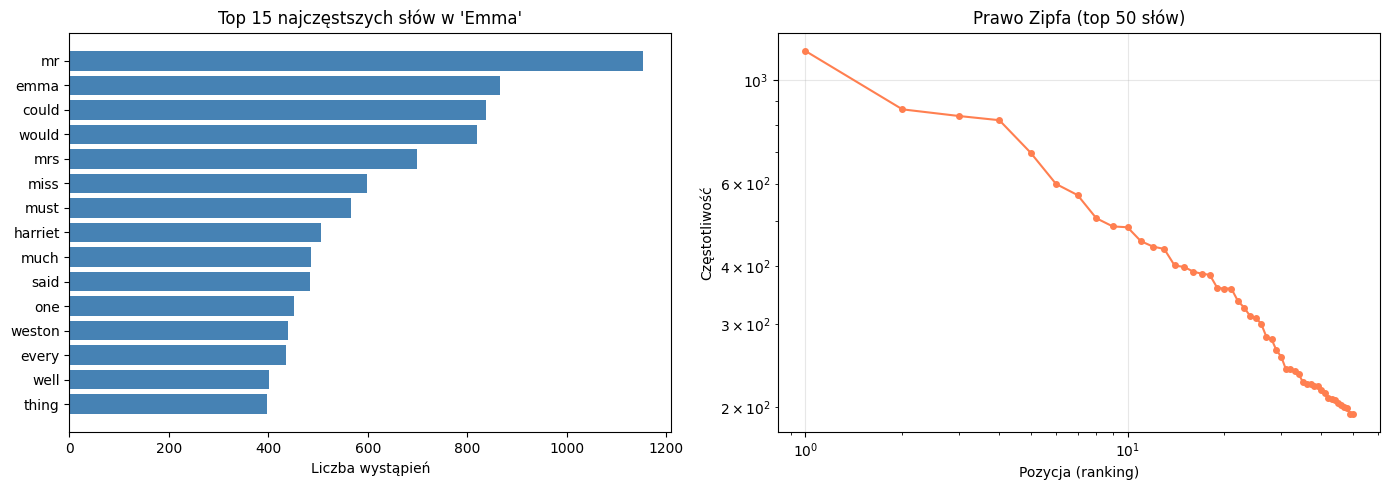


💡 Prawo Zipfa: kilka słów występuje BARDZO często,
   a ogromna większość słów występuje rzadko. Ten wzorzec
   pojawia się w każdym naturalnym języku!


In [ ]:
from nltk import FreqDist
from nltk.corpus import gutenberg
import matplotlib.pyplot as plt

# Use a larger text from the Gutenberg corpus for more interesting results
# 'Emma' by Jane Austen
emma_words = gutenberg.words('austen-emma.txt')

# Clean: lowercase, remove punctuation and stop words
emma_clean = [
    w.lower() for w in emma_words
    if w.isalpha() and w.lower() not in stop_words
]

# Calculate frequency distribution
freq_dist = FreqDist(emma_clean)

print("=" * 60)
print("ANALIZA CZĘSTOTLIWOŚCI — 'Emma' Jane Austen")
print("=" * 60)
print(f"Łączna liczba słów (po filtracji): {len(emma_clean)}")
print(f"Unikalne słowa: {len(freq_dist)}\n")

print("Top 20 najczęstszych słów:")
print("-" * 35)
for i, (word, count) in enumerate(freq_dist.most_common(20), 1):
    bar = "█" * (count // 30)
    print(f"{i:>2}. {word:<15} {count:>5}  {bar}")

# Visualization
plt.figure(figsize=(14, 5))

# Bar chart
plt.subplot(1, 2, 1)
top_words = freq_dist.most_common(15)
words_list = [w for w, c in top_words]
counts_list = [c for w, c in top_words]
plt.barh(words_list[::-1], counts_list[::-1], color='steelblue')
plt.title("Top 15 najczęstszych słów w 'Emma'")
plt.xlabel("Liczba wystąpień")

# Zipf's law plot
plt.subplot(1, 2, 2)
ranks = range(1, 51)
frequencies = [freq_dist.most_common(50)[i-1][1] for i in ranks]
plt.plot(ranks, frequencies, 'o-', color='coral', markersize=4)
plt.title("Prawo Zipfa (top 50 słów)")
plt.xlabel("Pozycja (ranking)")
plt.ylabel("Częstotliwość")
plt.yscale('log')
plt.xscale('log')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Prawo Zipfa: kilka słów występuje BARDZO często,")
print("   a ogromna większość słów występuje rzadko. Ten wzorzec")
print("   pojawia się w każdym naturalnym języku!")

---
## 8. 🔗 N-gramy

### Co to są N-gramy?

**N-gramy** to sekwencje N kolejnych elementów (zwykle słów) wyciągnięte z tekstu.

Dla zdania *"The cat sat on the mat"*:

- **Bigramy** (N=2): *(the, cat), (cat, sat), (sat, on), (on, the), (the, mat)*
- **Trigramy** (N=3): *(the, cat, sat), (cat, sat, on), (sat, on, the), (on, the, mat)*

### Po co to robimy?

Pojedyncze słowa (unigramy) tracą **kontekst**. Słowo "New" samo w sobie nic nie mówi, ale bigram "New York" jest bardzo informatywny.

N-gramy są używane do:
- **Autouzupełniania** — przewidywania następnego słowa
- **Identyfikacji fraz** — znajdowanie wyrażeń wielowyrazowych
- **Wykrywania plagiatu** — porównywanie n-gramów dwóch tekstów
- **Modelowania języka** — uczenie prawdopodobieństwa sekwencji słów

In [ ]:
from nltk import bigrams, trigrams, ngrams

# Clean tokens from our sample text
clean_tokens = [
    w.lower() for w in word_tokenize(sample_text)
    if w.isalpha() and w.lower() not in stop_words
]

# Generate bigrams and trigrams
bi = list(bigrams(clean_tokens))
tri = list(trigrams(clean_tokens))
four = list(ngrams(clean_tokens, 4))

print("=" * 60)
print("BIGRAMY (pary słów)")
print("=" * 60)
for bg in bi[:10]:
    print(f"  {bg[0]} + {bg[1]}")

print(f"\nŁącznie bigramów: {len(bi)}")

print("\n" + "=" * 60)
print("TRIGRAMY (trójki słów)")
print("=" * 60)
for tg in tri[:10]:
    print(f"  {tg[0]} + {tg[1]} + {tg[2]}")

print(f"\nŁącznie trigramów: {len(tri)}")

# Frequency of bigrams in a larger corpus
print("\n" + "=" * 60)
print("NAJCZĘSTSZE BIGRAMY w 'Emma' Jane Austen")
print("=" * 60)

emma_bigrams = list(bigrams(emma_clean))
bigram_freq = FreqDist(emma_bigrams)

for bg, count in bigram_freq.most_common(15):
    print(f"  {bg[0]:<12} + {bg[1]:<12} → {count} razy")

print("\n💡 Najczęstsze bigramy wskazują na powtarzające się frazy")
print("   i mogą pomóc zrozumieć styl autora.")

BIGRAMY (pary słów)
  natural + language
  language + processing
  processing + nlp
  nlp + fascinating
  fascinating + field
  field + artificial
  artificial + intelligence
  intelligence + helps
  helps + computers
  computers + understand

Łącznie bigramów: 75

TRIGRAMY (trójki słów)
  natural + language + processing
  language + processing + nlp
  processing + nlp + fascinating
  nlp + fascinating + field
  fascinating + field + artificial
  field + artificial + intelligence
  artificial + intelligence + helps
  intelligence + helps + computers
  helps + computers + understand
  computers + understand + interpret

Łącznie trigramów: 74

NAJCZĘSTSZE BIGRAMY w 'Emma' Jane Austen
  mr           + knightley    → 299 razy
  mrs          + weston       → 256 razy
  mr           + elton        → 229 razy
  miss         + woodhouse    → 173 razy
  mr           + weston       → 167 razy
  frank        + churchill    → 151 razy
  mrs          + elton        → 150 razy
  mr           + woodh

---
## 9. 😊😐😠 Analiza sentymentu (Sentiment Analysis)

### Co to jest analiza sentymentu?

**Analiza sentymentu** (analiza wydźwięku/nastrojów) to automatyczne określanie, czy tekst wyraża **pozytywne**, **negatywne**, czy **neutralne** uczucia.

Przykłady:
- *"This movie was absolutely amazing!"* → 😊 **Pozytywny**
- *"The food was terrible and the service was slow."* → 😠 **Negatywny**
- *"The meeting is scheduled for 3 PM."* → 😐 **Neutralny**

### VADER — nasz narzędzie do analizy sentymentu

**VADER** (Valence Aware Dictionary and sEntiment Reasoner) to narzędzie NLTK specjalnie zaprojektowane do analizy sentymentu w tekstach z mediów społecznościowych. Rozumie:

- **Wielkie litery**: "AMAZING" jest silniejsze niż "amazing"
- **Emotikony**: 😊 to sygnał pozytywny
- **Intensyfikatory**: "very good" jest silniejsze niż "good"
- **Negację**: "not good" to negatywne, mimo że "good" jest pozytywne

VADER zwraca 4 wyniki:
- **neg** — proporcja negatywnych emocji (0-1)
- **neu** — proporcja neutralnych emocji (0-1)
- **pos** — proporcja pozytywnych emocji (0-1)
- **compound** — zagregowany wynik od -1 (bardzo negatywny) do +1 (bardzo pozytywny)

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Test sentences with different sentiments
test_sentences = [
    "This movie was absolutely fantastic! I loved every minute of it.",
    "The food was terrible and the service was incredibly slow.",
    "The meeting is scheduled for 3 PM tomorrow.",
    "I'm not sure if I liked the book, it was okay I guess.",
    "BEST DAY EVER!!! So happy right now :)",
    "This is the worst experience I have ever had. Never again.",
    "The weather is nice but the traffic is horrible.",
    "The product quality is good, not great, not bad.",
]

print("=" * 70)
print("ANALIZA SENTYMENTU (VADER)")
print("=" * 70)

for sentence in test_sentences:
    scores = sia.polarity_scores(sentence)
    compound = scores['compound']

    # Determine sentiment emoji and label
    if compound >= 0.05:
        emoji = "😊"
        label = "POZYTYWNY"
    elif compound <= -0.05:
        emoji = "😠"
        label = "NEGATYWNY"
    else:
        emoji = "😐"
        label = "NEUTRALNY"

    print(f"\n{emoji} {label} (compound: {compound:+.3f})")
    print(f"   \"{sentence}\"")
    print(f"   pos={scores['pos']:.2f}  neu={scores['neu']:.2f}  neg={scores['neg']:.2f}")

print("\n" + "-" * 70)
print("💡 Compound score to najważniejszy wskaźnik:")
print("   > +0.05 → pozytywny")
print("   < -0.05 → negatywny")
print("   między -0.05 a +0.05 → neutralny")

ANALIZA SENTYMENTU (VADER)

😊 POZYTYWNY (compound: +0.854)
   "This movie was absolutely fantastic! I loved every minute of it."
   pos=0.51  neu=0.49  neg=0.00

😠 NEGATYWNY (compound: -0.477)
   "The food was terrible and the service was incredibly slow."
   pos=0.00  neu=0.74  neg=0.26

😐 NEUTRALNY (compound: +0.000)
   "The meeting is scheduled for 3 PM tomorrow."
   pos=0.00  neu=1.00  neg=0.00

😠 NEGATYWNY (compound: -0.339)
   "I'm not sure if I liked the book, it was okay I guess."
   pos=0.13  neu=0.56  neg=0.30

😊 POZYTYWNY (compound: +0.930)
   "BEST DAY EVER!!! So happy right now :)"
   pos=0.72  neu=0.28  neg=0.00

😠 NEGATYWNY (compound: -0.625)
   "This is the worst experience I have ever had. Never again."
   pos=0.00  neu=0.69  neg=0.31

😠 NEGATYWNY (compound: -0.593)
   "The weather is nice but the traffic is horrible."
   pos=0.14  neu=0.51  neg=0.35

😠 NEGATYWNY (compound: -0.414)
   "The product quality is good, not great, not bad."
   pos=0.20  neu=0.41  neg=0.39

-

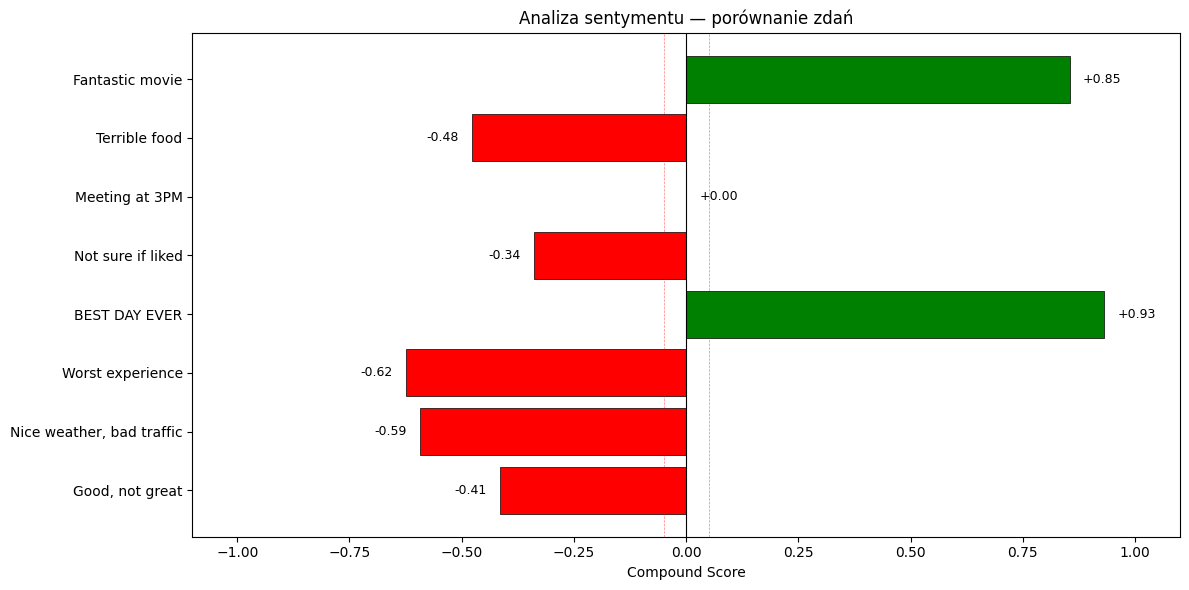

In [ ]:
# Visualize sentiment comparison
import matplotlib.pyplot as plt
import numpy as np

# Short labels for chart
labels = [
    "Fantastic movie",
    "Terrible food",
    "Meeting at 3PM",
    "Not sure if liked",
    "BEST DAY EVER",
    "Worst experience",
    "Nice weather, bad traffic",
    "Good, not great",
]

compounds = [sia.polarity_scores(s)['compound'] for s in test_sentences]
colors = ['green' if c >= 0.05 else 'red' if c <= -0.05 else 'gray' for c in compounds]

plt.figure(figsize=(12, 6))
bars = plt.barh(labels[::-1], compounds[::-1], color=colors[::-1], edgecolor='black', linewidth=0.5)
plt.axvline(x=0, color='black', linewidth=0.8)
plt.axvline(x=0.05, color='green', linewidth=0.5, linestyle='--', alpha=0.5)
plt.axvline(x=-0.05, color='red', linewidth=0.5, linestyle='--', alpha=0.5)
plt.xlabel('Compound Score')
plt.title('Analiza sentymentu — porównanie zdań')
plt.xlim(-1.1, 1.1)

for bar, val in zip(bars, compounds[::-1]):
    plt.text(val + (0.03 if val >= 0 else -0.03), bar.get_y() + bar.get_height()/2,
             f'{val:+.2f}', va='center', ha='left' if val >= 0 else 'right', fontsize=9)

plt.tight_layout()
plt.show()

---
## 10. ☁️ Dystrybucja leksykalna i chmura słów

### Dystrybucja leksykalna

**Dystrybucja leksykalna** opisuje **jak zróżnicowany jest słownik** w danym tekście. Możemy sprawdzić:
- Ile **unikalnych** słów jest w tekście?
- Jaki jest stosunek unikalnych słów do wszystkich (tzw. **lexical diversity**)?
- Jak rozkładają się długości słów?

### Chmura słów (Word Cloud)

**Chmura słów** to popularna wizualizacja, w której **wielkość słowa odzwierciedla jego częstotliwość** w tekście. Najczęstsze słowa są wyświetlane największą czcionką.

To świetne narzędzie do szybkiego zrozumienia, o czym jest dany tekst.

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# --- Lexical diversity analysis ---
emma_all = [w.lower() for w in gutenberg.words('austen-emma.txt') if w.isalpha()]
emma_filtered = [w for w in emma_all if w not in stop_words]

total_words = len(emma_filtered)
unique_words = len(set(emma_filtered))
diversity = unique_words / total_words

print("=" * 60)
print("DYSTRYBUCJA LEKSYKALNA — 'Emma' Jane Austen")
print("=" * 60)
print(f"Łączna liczba słów (bez stop words): {total_words:,}")
print(f"Unikalne słowa:                      {unique_words:,}")
print(f"Różnorodność leksykalna:             {diversity:.4f} ({diversity*100:.2f}%)")
print(f"\nKażde unikalne słowo pojawia się średnio {total_words/unique_words:.1f} razy.")

# Word length distribution
word_lengths = [len(w) for w in emma_filtered]
length_freq = FreqDist(word_lengths)

print("\nRozkład długości słów:")
print("-" * 40)
for length in sorted(length_freq.keys())[:12]:
    count = length_freq[length]
    bar = "█" * (count // 200)
    print(f"  {length:>2} liter: {count:>5} {bar}")

DYSTRYBUCJA LEKSYKALNA — 'Emma' Jane Austen
Łączna liczba słów (bez stop words): 73,149
Unikalne słowa:                      6,948
Różnorodność leksykalna:             0.0950 (9.50%)

Każde unikalne słowo pojawia się średnio 10.5 razy.

Rozkład długości słów:
----------------------------------------
   1 liter:    34 
   2 liter:  1710 ████████
   3 liter:  4915 ████████████████████████
   4 liter: 16240 █████████████████████████████████████████████████████████████████████████████████
   5 liter: 13675 ████████████████████████████████████████████████████████████████████
   6 liter: 10691 █████████████████████████████████████████████████████
   7 liter:  9308 ██████████████████████████████████████████████
   8 liter:  5800 █████████████████████████████
   9 liter:  5372 ██████████████████████████
  10 liter:  2702 █████████████
  11 liter:  1353 ██████
  12 liter:   792 ███


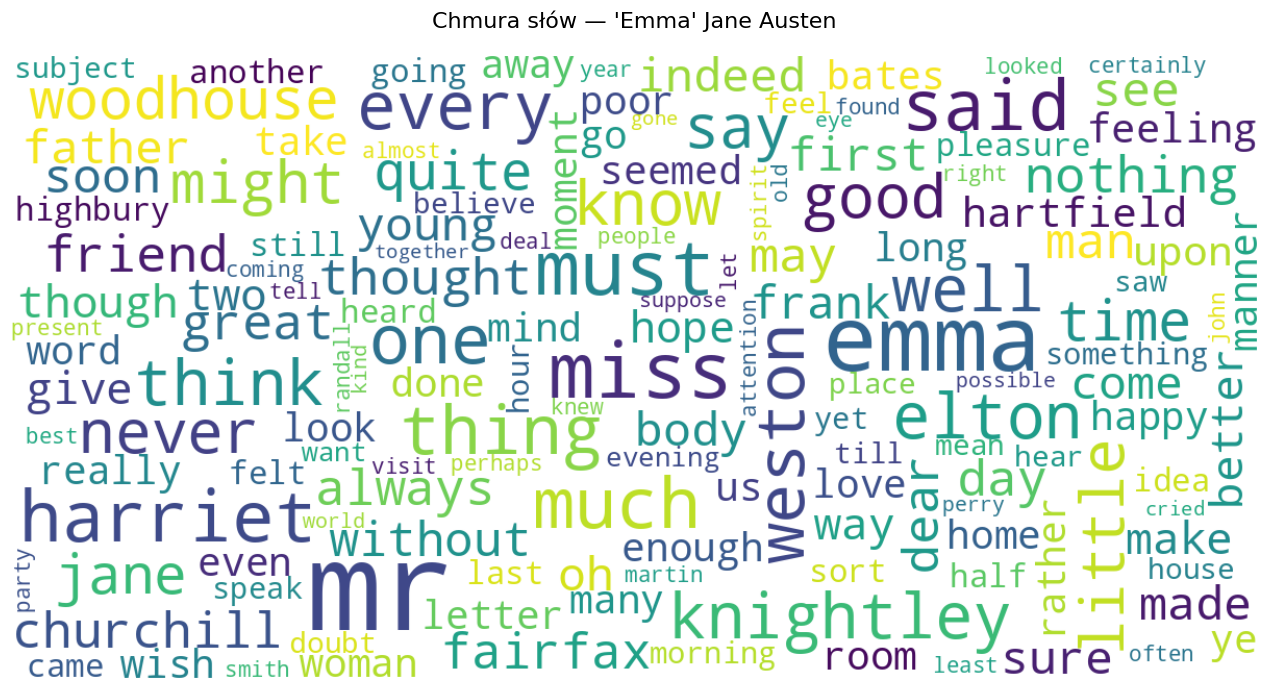

💡 Im większe słowo, tym częściej występuje w tekście.
   Widać od razu, że najważniejszymi postaciami są:
   Emma, Harriet, Weston, Knightley — główni bohaterowie powieści!


In [ ]:
# --- Word Cloud ---
text_for_cloud = " ".join(emma_filtered)

wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    max_words=150,
    colormap='viridis',
    collocations=False,
    min_font_size=8,
    max_font_size=120,
).generate(text_for_cloud)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Chmura słów — 'Emma' Jane Austen", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

print("💡 Im większe słowo, tym częściej występuje w tekście.")
print("   Widać od razu, że najważniejszymi postaciami są:")
print("   Emma, Harriet, Weston, Knightley — główni bohaterowie powieści!")

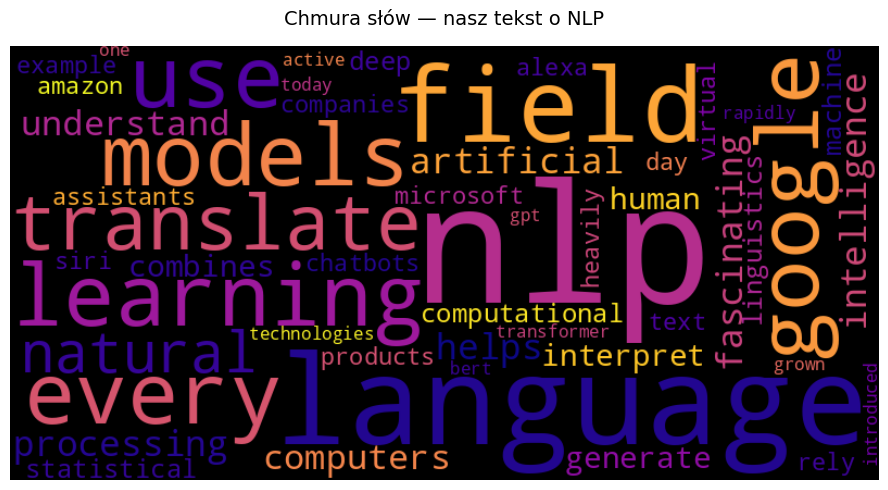

In [ ]:
# --- Word Cloud for our NLP sample text ---
nlp_cloud_text = " ".join([
    w.lower() for w in word_tokenize(sample_text)
    if w.isalpha() and w.lower() not in stop_words
])

wordcloud_nlp = WordCloud(
    width=800,
    height=400,
    background_color='black',
    max_words=50,
    colormap='plasma',
    collocations=False,
).generate(nlp_cloud_text)

plt.figure(figsize=(12, 5))
plt.imshow(wordcloud_nlp, interpolation='bilinear')
plt.axis('off')
plt.title("Chmura słów — nasz tekst o NLP", fontsize=14, pad=15)
plt.tight_layout()
plt.show()